In [1]:
pathdf = r'content/combined_lagEDA.csv' # Main Dataset Path 
Yvar = 'Stress' # Here is the name of the variable Y to predict 
aggtype = ['mean', 'std'] #group ways std
palette = 'flare'
seed = 49
test_size = 0.30 #This is %size of test of this project 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Here is my data load function using the pandas library, i Loaded 12445 rows and 49 columns
df = pd.read_csv(pathdf)  

# Show the first 5 rows of the DataFrame

In [6]:
df.head()

,30,29,28,27,26,25,24,23,22,21,...,HRR_Mean,HRR_Min,HRR_Max,HRR_Std,HRR_RMS,TEMPR_Mean,TEMPR_Min,TEMPR_Max,TEMPR_Std,Stress
0,0.132578,0.123534,0.115152,0.110787,0.109565,0.106694,0.100631,0.093710,0.088657,0.084547,...,0.641552,0.639566,0.643243,0.100525,0.235069,0.821491,0.821239,0.823944,0.120422,0.0
1,0.123534,0.115152,0.110787,0.109565,0.106694,0.100631,0.093710,0.088657,0.084547,0.084598,...,0.642973,0.639566,0.643243,0.089270,0.229293,0.827471,0.828319,0.830986,0.105027,0.0
2,0.115152,0.110787,0.109565,0.106694,0.100631,0.093710,0.088657,0.084547,0.084598,0.089846,...,0.643921,0.640921,0.645946,0.083372,0.157093,0.832395,0.831858,0.834507,0.099446,0.0
3,0.110787,0.109565,0.106694,0.100631,0.093710,0.088657,0.084547,0.084598,0.089846,0.094890,...,0.645952,0.644986,0.645946,0.041375,0.131024,0.837759,0.842478,0.839789,0.089739,0.0
4,0.109565,0.106694,0.100631,0.093710,0.088657,0.084547,0.084598,0.089846,0.094890,0.098347,...,0.646764,0.644986,0.648649,0.066093,0.113470,0.843123,0.846018,0.848592,0.095171,0.0


# Generate summary statistics of the DataFrame

In [12]:
# Here are my selected only the desired columns for this project below and update data frame df will load future function 
selected_columns = ['EDAR_Mean', 'EDAR_Std', 'Num_PeaksR', 'HRR_Mean', 'HRR_Std', 'TEMPR_Mean', 'TEMPR_Std', 'Stress']
df = df[selected_columns]
df.head()

,EDAR_Mean,EDAR_Std,Num_PeaksR,HRR_Mean,HRR_Std,TEMPR_Mean,TEMPR_Std,Stress
0,0.105191,0.035656,0.0,0.641552,0.100525,0.821491,0.120422,0.0
1,0.102822,0.023788,0.0,0.642973,0.089270,0.827471,0.105027,0.0
2,0.101157,0.018717,0.0,0.643921,0.083372,0.832395,0.099446,0.0
3,0.099952,0.011283,0.0,0.645952,0.041375,0.837759,0.089739,0.0
4,0.099298,0.005735,0.0,0.646764,0.066093,0.843123,0.095171,0.0


In [17]:
# Here is assuming the DataFrame 'df' and group by column 'Yvar' and apply aggregation function(s) from 'aggtype'
df.groupby(Yvar).agg(aggtype)

EDAR_Mean            EDAR_Std           Num_PeaksR            HRR_Mean  \
            mean       std      mean       std       mean       std      mean   
Stress                                                                          
0.0     0.172351  0.104366  0.055162  0.065891   0.070518  0.175894  0.537097   
1.0     0.229339  0.099549  0.074894  0.100680   0.078889  0.188306  0.544647   
2.0     0.243203  0.092572  0.068570  0.088467   0.075967  0.183242  0.518548   

                   HRR_Std           TEMPR_Mean           TEMPR_Std            
             std      mean       std       mean       std      mean       std  
Stress                                                                         
0.0     0.243840  0.057534  0.031945   0.541063  0.189222  0.082361  0.051351  
1.0     0.206367  0.060759  0.035588   0.391931  0.203591  0.084292  0.043802  
2.0     0.239898  0.059565  0.024887   0.419816  0.200942  0.080754  0.044670

In [18]:
# Here is assuming 'df' this DataFrame
df.corr()

,EDAR_Mean,EDAR_Std,Num_PeaksR,HRR_Mean,HRR_Std,TEMPR_Mean,TEMPR_Std,Stress
EDAR_Mean,1.000000,0.375326,0.007842,0.028150,0.012492,0.029463,0.002551,0.308340
EDAR_Std,0.375326,1.000000,-0.200031,-0.058697,0.073785,-0.016977,0.019933,0.075108
Num_PeaksR,0.007842,-0.200031,1.000000,0.013078,-0.013462,-0.006776,-0.005626,0.013914
HRR_Mean,0.028150,-0.058697,0.013078,1.000000,-0.128394,-0.291501,0.090610,-0.034776
HRR_Std,0.012492,0.073785,-0.013462,-0.128394,1.000000,0.022783,0.008214,0.031129
TEMPR_Mean,0.029463,-0.016977,-0.006776,-0.291501,0.022783,1.000000,-0.161525,-0.269011
TEMPR_Std,0.002551,0.019933,-0.005626,0.090610,0.008214,-0.161525,1.000000,-0.014696
Stress,0.308340,0.075108,0.013914,-0.034776,0.031129,-0.269011,-0.014696,1.000000


In [19]:
# I have assuming this DataFrame 'df' and a column name for grouping 'Yvar'
df.groupby(Yvar).corr() 

EDAR_Mean  EDAR_Std  Num_PeaksR  HRR_Mean   HRR_Std  \
Stress                                                                   
0.0    EDAR_Mean    1.000000  0.311763    0.032471  0.036961 -0.043227   
       EDAR_Std     0.311763  1.000000   -0.198056 -0.042510  0.083540   
       Num_PeaksR   0.032471 -0.198056    1.000000  0.012962 -0.022884   
       HRR_Mean     0.036961 -0.042510    0.012962  1.000000 -0.135003   
       HRR_Std     -0.043227  0.083540   -0.022884 -0.135003  1.000000   
       TEMPR_Mean   0.090281 -0.045620    0.039128 -0.101396  0.006705   
       TEMPR_Std    0.027046  0.028671    0.003039  0.063376  0.011635   
1.0    EDAR_Mean    1.000000  0.405874   -0.027687  0.016246  0.053092   
       EDAR_Std     0.405874  1.000000   -0.210174 -0.023803  0.031716   
       Num_PeaksR  -0.027687 -0.210174    1.000000  0.003314 -0.004141   
       HRR_Mean     0.016246 -0.023803    0.003314  1.000000 -0.099334   
       HRR_Std      0.053092  0.031716   -0.004141 -0.099334  1.000000   
       TEMPR_Mean   0.250392  0.017970   -0.038163 -0.404771  0.072654   
       TEMPR_Std    0.012960  0.014827    0.002076  0.082831 -0.005799   
2.0    EDAR_Mean    1.000000  0.420906   -0.017802  0.051165  0.034704   
       EDAR_Std     0.420906  1.000000   -0.207471 -0.090419  0.090499   
       Num_PeaksR  -0.017802 -0.207471    1.000000  0.017804 -0.009649   
       HRR_Mean     0.051165 -0.090419    0.017804  1.000000 -0.141445   
       HRR_Std      0.034704  0.090499   -0.009649 -0.141445  1.000000   
       TEMPR_Mean   0.142974  0.059465   -0.024113 -0.506054  0.057710   
       TEMPR_Std   -0.029397  0.015263   -0.020333  0.127405  0.011461   

                   TEMPR_Mean  TEMPR_Std  
Stress                                    
0.0    EDAR_Mean     0.090281   0.027046  
       EDAR_Std     -0.045620   0.028671  
       Num_PeaksR    0.039128   0.003039  
       HRR_Mean     -0.101396   0.063376  
       HRR_Std       0.006705   0.011635  
       TEMPR_Mean    1.000000  -0.165722  
       TEMPR_Std    -0.165722   1.000000  
1.0    EDAR_Mean     0.250392   0.012960  
       EDAR_Std      0.017970   0.014827  
       Num_PeaksR   -0.038163   0.002076  
       HRR_Mean     -0.404771   0.082831  
       HRR_Std       0.072654  -0.005799  
       TEMPR_Mean    1.000000  -0.145512  
       TEMPR_Std    -0.145512   1.000000  
2.0    EDAR_Mean     0.142974  -0.029397  
       EDAR_Std      0.059465   0.015263  
       Num_PeaksR   -0.024113  -0.020333  
       HRR_Mean     -0.506054   0.127405  
       HRR_Std       0.057710   0.011461  
       TEMPR_Mean    1.000000  -0.190827  
       TEMPR_Std    -0.190827   1.000000

In [13]:
# Check for missing values in each column
df.isnull().sum()


EDAR_Mean     0
EDAR_Std      0
Num_PeaksR    0
HRR_Mean      0
HRR_Std       0
TEMPR_Mean    0
TEMPR_Std     0
Stress        0
dtype: int64

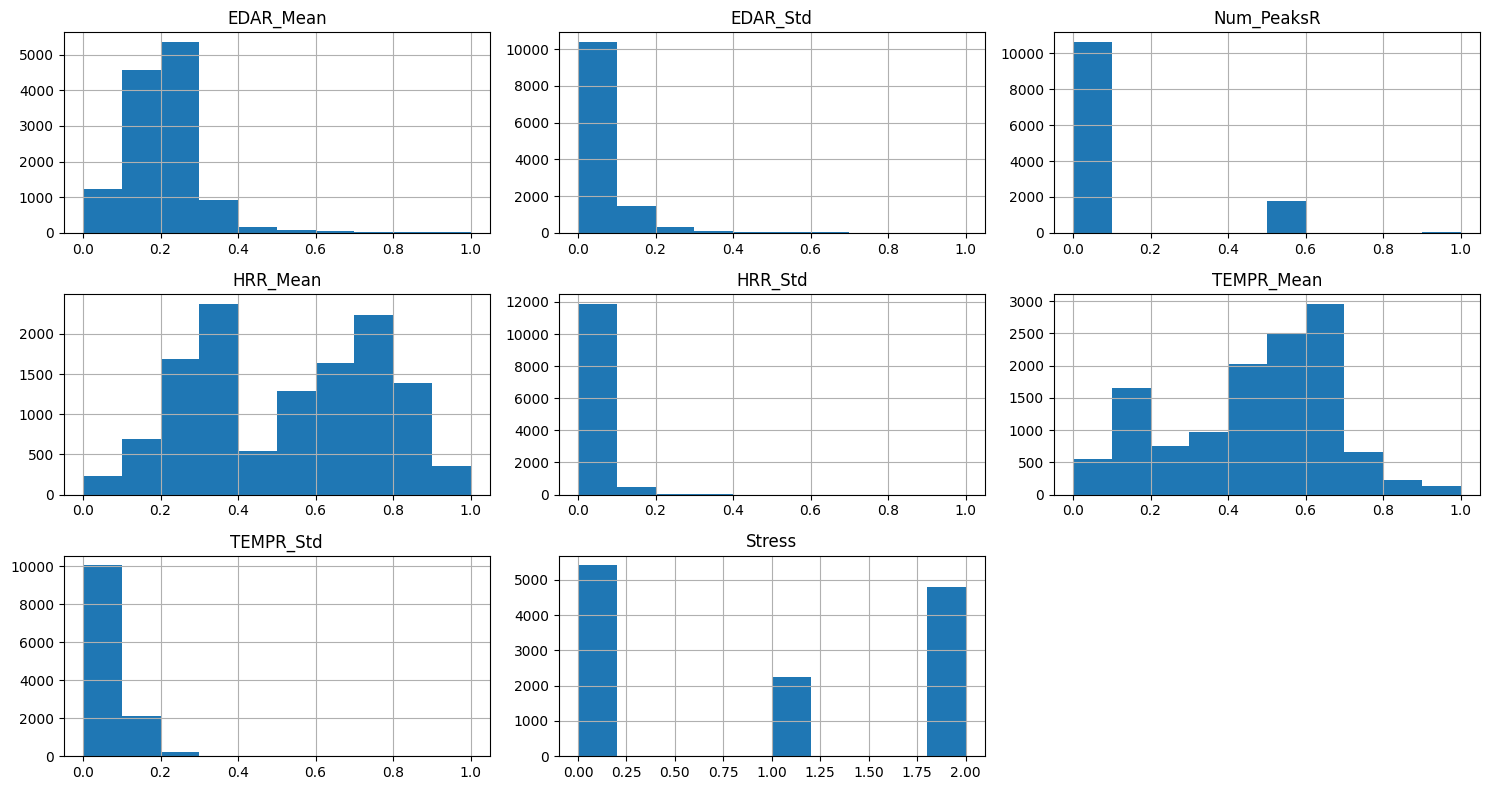

In [24]:
# Plot a histogram for each column (This may be time-consuming for a large dataset)
df.hist(figsize=(15,8))
plt.tight_layout() # adjusts subplot params so that subplots fit in the figure area.
plt.show()


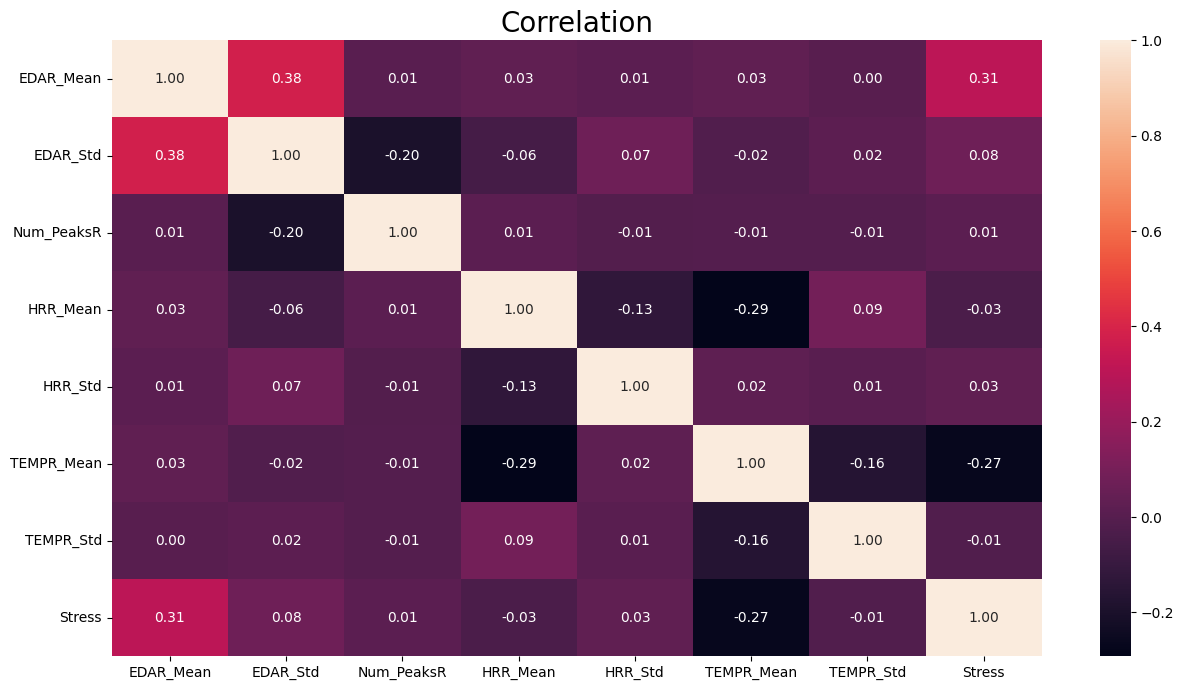

In [22]:
# Plot a correlation matrix heatmap
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")

# title 'Correlation' to the plot with a font size of 20
plt.title('Correlation', fontsize=20)

# Display the plot
plt.show()


In [29]:
# Calculate the correlation matrix
corr = df.corr()

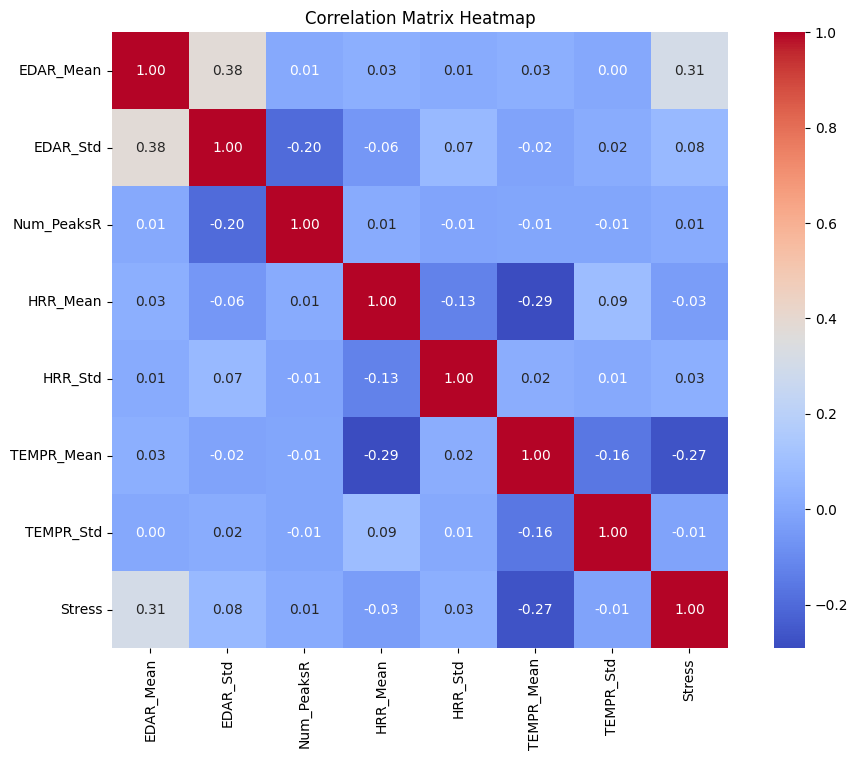

In [33]:
# Draw the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm',
            cbar=True, square=True)

plt.title('Correlation Matrix Heatmap')
plt.show()

In [32]:
print(df.corr()['Stress'])

EDAR_Mean     0.308340
EDAR_Std      0.075108
Num_PeaksR    0.013914
HRR_Mean     -0.034776
HRR_Std       0.031129
TEMPR_Mean   -0.269011
TEMPR_Std    -0.014696
Stress        1.000000
Name: Stress, dtype: float64


<Figure size 1500x800 with 0 Axes>

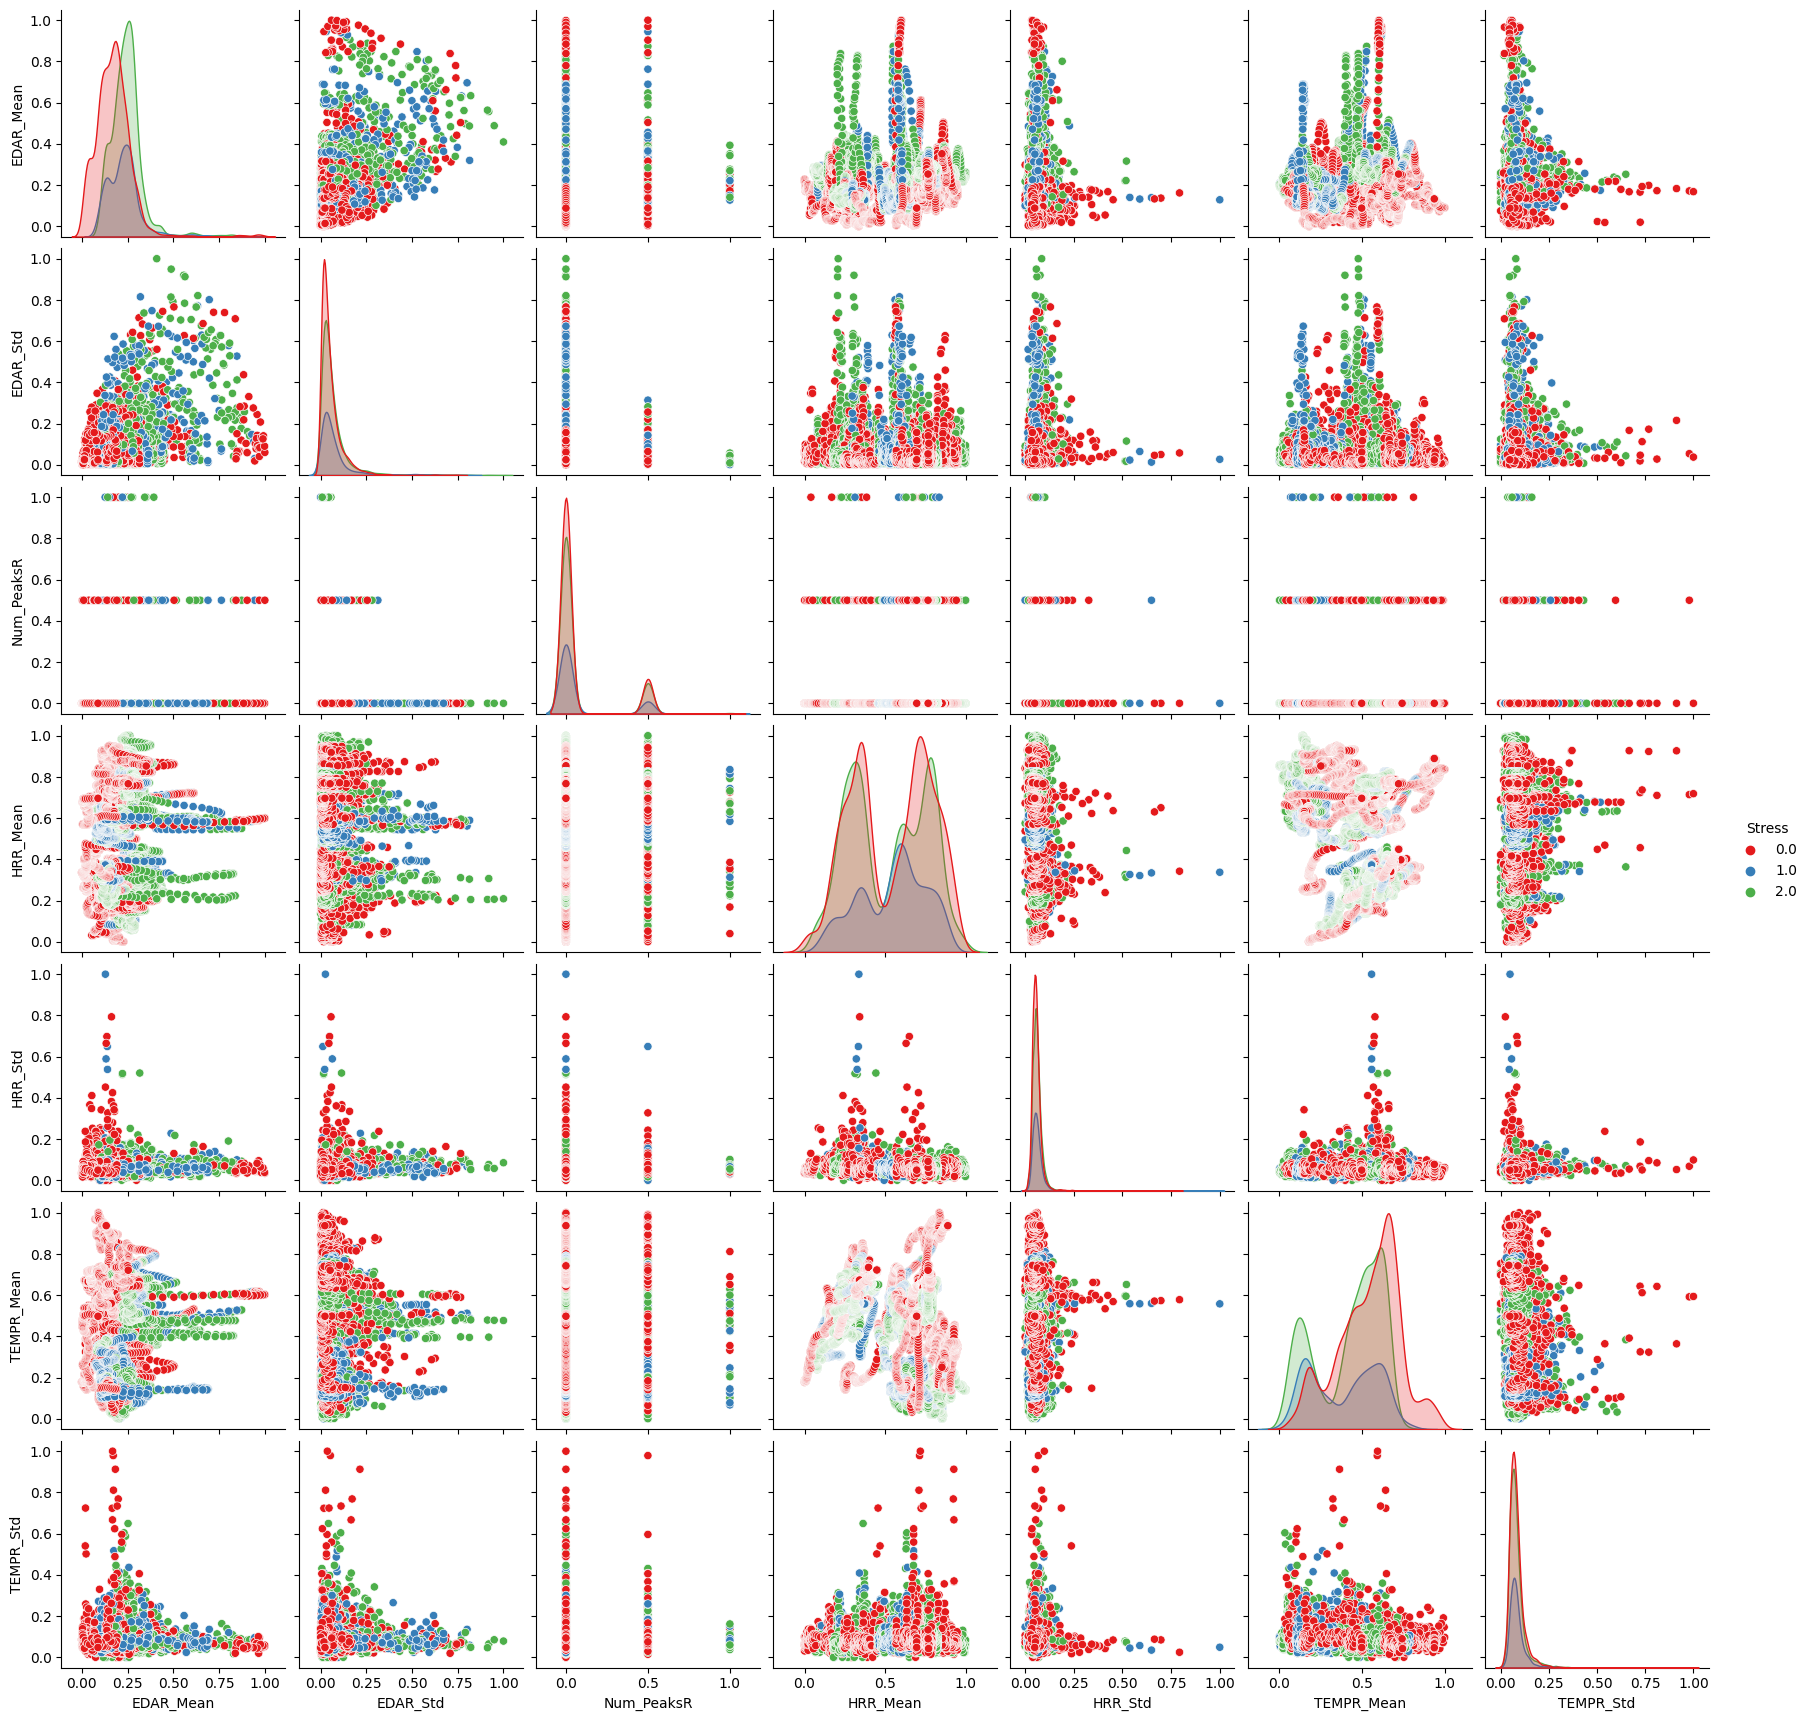

In [59]:
#Here is pairplot using Seaborn with specific figure size 15x8, hue, and color palette 
plt.figure(figsize = (15,8))
sns.pairplot(df, hue=Yvar, palette=palette)

## Logistic Regression model

In [71]:
## Logistic Regression model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X = df.drop('Stress', axis=1)
y = df['Stress']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("feature importance")
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.coef_[0]})
print(feature_importance)

[[853   1 220]
 [139   0 311]
 [318   1 646]]
              precision    recall  f1-score   support

         0.0       0.65      0.79      0.72      1074
         1.0       0.00      0.00      0.00       450
         2.0       0.55      0.67      0.60       965

    accuracy                           0.60      2489
   macro avg       0.40      0.49      0.44      2489
weighted avg       0.49      0.60      0.54      2489

feature importance
      Feature  Importance
0   EDAR_Mean   -0.790041
1    EDAR_Std    0.075686
2  Num_PeaksR   -0.005273
3    HRR_Mean    0.238417
4     HRR_Std   -0.049126
5  TEMPR_Mean    0.679972
6   TEMPR_Std    0.130777


##  Decision Tree Classifier model

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


X = df.drop('Stress', axis=1)
Y = df['Stress']



X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

[[845   0 229]
 [164   0 286]
 [283   0 682]]
              precision    recall  f1-score   support

         0.0       0.65      0.79      0.71      1074
         1.0       0.00      0.00      0.00       450
         2.0       0.57      0.71      0.63       965

    accuracy                           0.61      2489
   macro avg       0.41      0.50      0.45      2489
weighted avg       0.50      0.61      0.55      2489

0.6134993973483327


c:\Users\TARIQ-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\TARIQ-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\TARIQ-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

## K-Nearest Neighbors (KNN) model

In [53]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Preparing the feature matrix (X) and target vector (Y) by dropping the target variable (Yvar) from the DataFrame (df)
X = df.drop(Yvar, axis=1)
Y = df[Yvar]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

# Initialize a K-Nearest Neighbors (KNN) classifier with 3 nearest neighbors 
knn = KNeighborsClassifier(n_neighbors=3)

# Training the model
knn.fit(X_train, y_train)

# Computing the accuracy of the model
print("Accuracy: ", accuracy_score(y_test, knn.predict(X_test)))


Accuracy:  0.8525512253917236


##  Naive Bayes model 

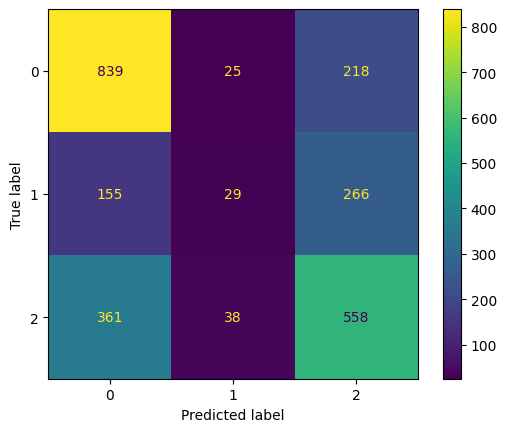

              precision    recall  f1-score   support

         0.0       0.62      0.78      0.69      1082
         1.0       0.32      0.06      0.11       450
         2.0       0.54      0.58      0.56       957

    accuracy                           0.57      2489
   macro avg       0.49      0.47      0.45      2489
weighted avg       0.53      0.57      0.53      2489



In [56]:
# Import the necessary libraries
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Preparing the feature matrix (X) and target vector (Y) by dropping the target variable (Yvar) from the DataFrame (df)
X = df.drop(Yvar, axis=1)
Y = df[Yvar]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

# Initialize and train the Naive Bayes model
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)

# Make predictions using the trained model on the test data
predictions = model_NB.predict(X_test)

# Calculate the confusion matrix using the true labels (y_test) and the predicted labels (predictions)
confusion_matrix = metrics.confusion_matrix(y_test, predictions)

# Create a confusion matrix display with the calculated confusion matrix and display labels [0, 1, 2]
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1, 2])

# Plot the confusion matrix
cm_display.plot()
plt.show()

# Print the classification report
print(classification_report(y_test, predictions))


## Decision Trees model

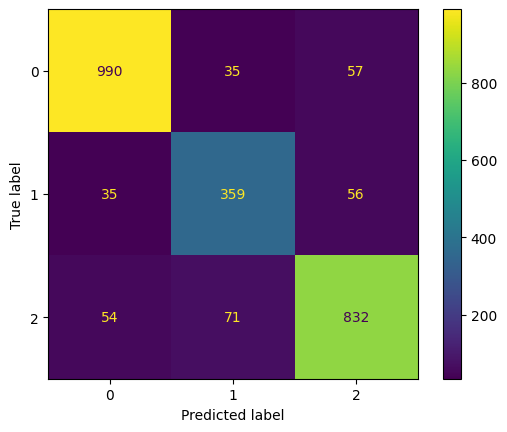

              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92      1082
         1.0       0.77      0.80      0.78       450
         2.0       0.88      0.87      0.87       957

    accuracy                           0.88      2489
   macro avg       0.86      0.86      0.86      2489
weighted avg       0.88      0.88      0.88      2489



In [57]:
# Import the necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Preparing the feature matrix (X) and target vector (Y) by dropping the target variable (Yvar) from the DataFrame (df)
X = df.drop(Yvar, axis=1)
Y = df[Yvar]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

# Initialize and train the Decision Trees model with a specified max_depth and random_state
model_DT = DecisionTreeClassifier(max_depth=40, random_state=101)
model_DT.fit(X_train, y_train)

# Make predictions using the trained model on the test data
predictions = model_DT.predict(X_test)

# Calculate the confusion matrix using the true labels (y_test) and the predicted labels (predictions)
confusion_matrix = metrics.confusion_matrix(y_test, predictions)

# Create a confusion matrix display with the calculated confusion matrix and display labels [0, 1, 2]
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1, 2])

# Plot the confusion matrix
cm_display.plot()
plt.show()

# Print the classification report
print(classification_report(y_test, predictions))


## Random Forest model

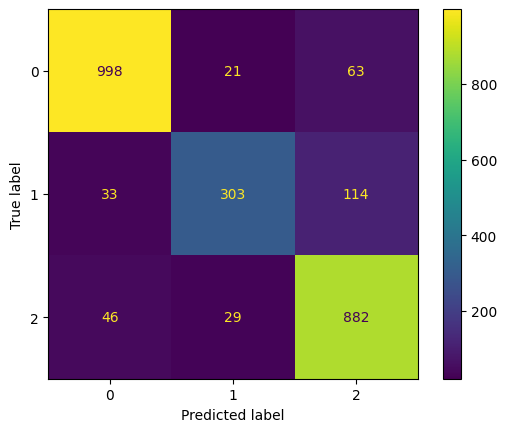

              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92      1082
         1.0       0.86      0.67      0.75       450
         2.0       0.83      0.92      0.88       957

    accuracy                           0.88      2489
   macro avg       0.87      0.84      0.85      2489
weighted avg       0.88      0.88      0.87      2489



In [58]:
# Import the necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Preparing the feature matrix (X) and target vector (Y) by dropping the target variable (Yvar) from the DataFrame (df)
X = df.drop(Yvar, axis=1)
Y = df[Yvar]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

# Initialize and train the Random Forest model with a specified number of estimators and random_state
model_RF = RandomForestClassifier(n_estimators=100, random_state=101)
model_RF.fit(X_train, y_train)

# Make predictions using the trained model on the test data
predictions = model_RF.predict(X_test)

# Calculate the confusion matrix using the true labels (y_test) and the predicted labels (predictions)
confusion_matrix = metrics.confusion_matrix(y_test, predictions)

# Create a confusion matrix display with the calculated confusion matrix and display labels [0, 1, 2]
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1, 2])

# Plot the confusion matrix
cm_display.plot()
plt.show()

# Print the classification report
print(classification_report(y_test, predictions))


In [89]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Load your data
data = pd.read_csv('content/combined_lagEDA.csv') # use this if your data is in a csv file

# Split the data into features and target
# All columns except 'Stress' are considered as features
X = data.drop('Stress', axis=1)
y = data['Stress']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Use the model to make predictions on the test data
y_pred = clf.predict(X_test)

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Print the classification report
print(classification_report(y_test, y_pred))


[[1011   28   35]
 [  32  352   66]
 [  49   81  835]]
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93      1074
         1.0       0.76      0.78      0.77       450
         2.0       0.89      0.87      0.88       965

    accuracy                           0.88      2489
   macro avg       0.86      0.86      0.86      2489
weighted avg       0.88      0.88      0.88      2489



In [92]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Load your data
data = pd.read_csv('content/combined_lagEDA.csv') # use this if your data is in a csv file

# Split the data into features and target
# All columns except 'Stress' are considered as features
X = data.drop('Stress', axis=1)
y = data['Stress']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Use the model to make predictions on the test data
y_pred = clf.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Generate the classification report
classification_rep = classification_report(y_test, y_pred)

# Print the classification report
print("\nClassification Report:")
print(classification_rep)


Confusion Matrix:
[[1013   27   34]
 [  38  344   68]
 [  48   77  840]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93      1074
         1.0       0.77      0.76      0.77       450
         2.0       0.89      0.87      0.88       965

    accuracy                           0.88      2489
   macro avg       0.86      0.86      0.86      2489
weighted avg       0.88      0.88      0.88      2489




Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93      1074
         1.0       0.77      0.76      0.77       450
         2.0       0.89      0.87      0.88       965

    accuracy                           0.88      2489
   macro avg       0.86      0.86      0.86      2489
weighted avg       0.88      0.88      0.88      2489



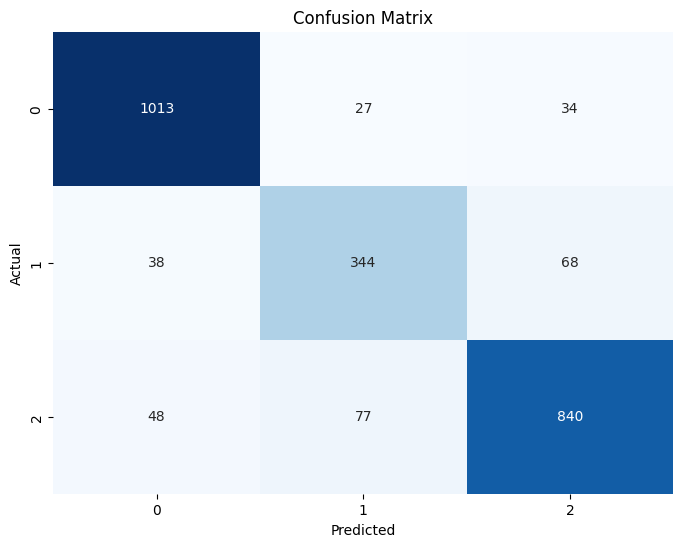

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Print the classification report
print("\nClassification Report:")
print(classification_rep)


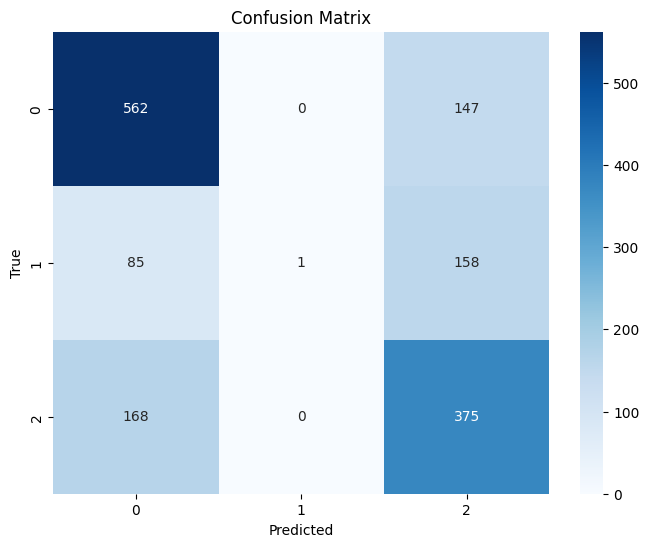

In [88]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test set using the trained Random Forest model
predictions = model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [81]:
# Required Libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Load the dataset
df = pd.read_csv('content/combined_lagEDA.csv')
print(df.head())  # print the first 5 rows of the original dataset

# Handling Missing Data
df.fillna(df.mean(), inplace=True)  # Replace missing values with the mean

# Outlier Detection and Handling
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)] # Removing outliers using IQR

# Data Transformation and Normalization
scaler = StandardScaler() # initialize the scaler
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns) # normalize the dataset
print(df_scaled.head())  # print the first 5 rows of the scaled dataset

# Convert 'Stress' column to integer type
df_scaled['Stress'] = df_scaled['Stress'].astype(int)

# Handling Imbalanced Dataset
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(df_scaled.drop('Stress', axis=1), df_scaled['Stress']) # 'Stress' is the target column
print(X_res.head())  # print the first 5 rows of the resampled data

# Feature Engineering
# Add your feature engineering steps here


         30        29        28        27        26        25        24  \
0  0.132578  0.123534  0.115152  0.110787  0.109565  0.106694  0.100631   
1  0.123534  0.115152  0.110787  0.109565  0.106694  0.100631  0.093710   
2  0.115152  0.110787  0.109565  0.106694  0.100631  0.093710  0.088657   
3  0.110787  0.109565  0.106694  0.100631  0.093710  0.088657  0.084547   
4  0.109565  0.106694  0.100631  0.093710  0.088657  0.084547  0.084598   

         23        22        21  ...  HRR_Mean   HRR_Min   HRR_Max   HRR_Std  \
0  0.093710  0.088657  0.084547  ...  0.641552  0.639566  0.643243  0.100525   
1  0.088657  0.084547  0.084598  ...  0.642973  0.639566  0.643243  0.089270   
2  0.084547  0.084598  0.089846  ...  0.643921  0.640921  0.645946  0.083372   
3  0.084598  0.089846  0.094890  ...  0.645952  0.644986  0.645946  0.041375   
4  0.089846  0.094890  0.098347  ...  0.646764  0.644986  0.648649  0.066093   

    HRR_RMS  TEMPR_Mean  TEMPR_Min  TEMPR_Max  TEMPR_Std  Stress  
0

In [87]:
# Print all column names in the DataFrame
print(df.columns)


Index(['30', '29', '28', '27', '26', '25', '24', '23', '22', '21', '20', '19',
       '18', '17', '16', '15', '14', '13', '12', '11', '10', '9', '8', '7',
       '6', '5', '4', '3', '2', '1', 'EDAR_Mean', 'EDAR_Min', 'EDAR_Max',
       'EDAR_Std', 'EDAR_Kurtosis', 'EDAR_Skew', 'Num_PeaksR',
       'EDAR_Amphitude', 'EDAR_Duration', 'HRR_Mean', 'HRR_Min', 'HRR_Max',
       'HRR_Std', 'HRR_RMS', 'TEMPR_Mean', 'TEMPR_Min', 'TEMPR_Max',
       'TEMPR_Std', 'Stress'],
      dtype='object')


##  Split the Data

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.70      0.68      0.69       930
           1       0.71      0.72      0.71       974

    accuracy                           0.70      1904
   macro avg       0.70      0.70      0.70      1904
weighted avg       0.70      0.70      0.70      1904



c:\Users\TARIQ-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Logistic Regression model

In [86]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X = df.drop('Stress', axis=1)
y = df['Stress']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("feature importance")
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.coef_[0]})
print(feature_importance)

[[562   0 147]
 [ 85   1 158]
 [168   0 375]]
              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       709
         1.0       1.00      0.00      0.01       244
         2.0       0.55      0.69      0.61       543

    accuracy                           0.63      1496
   macro avg       0.75      0.50      0.45      1496
weighted avg       0.69      0.63      0.57      1496

feature importance
           Feature  Importance
0               30   -0.595475
1               29    0.068652
2               28    0.527164
3               27    0.132465
4               26   -0.265674
5               25   -0.112469
6               24    0.250760
7               23   -0.112943
8               22   -0.015093
9               21   -0.090128
10              20   -0.045852
11              19   -0.066208
12              18   -0.225721
13              17    0.244238
14              16    0.014650
15              15   -0.207871
16              14    0.177

c:\Users\TARIQ-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
